# Subreddits

In this notebook we extract information from subreddits only.

In [28]:
import sys
import pandas as pd
from collections import defaultdict
import spacy
import math   
from spacy.util import minibatch , compounding , decaying
import random
import torch
import numpy as np
from sklearn.utils import shuffle
from progressbar import ProgressBar, Bar, Percentage
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# enable it to define your own optimizer (optional)
# from spacy_transformers.util import cyclic_triangular_rate
# from thinc.neural.optimizers import Adam
# from thinc.neural import Model

In [29]:
# load data
train_data_full = pd.read_csv("Q:\\tooBigToDrive\data-mining\kaggle\data\csv\\train_data.csv")
train_target_full = pd.read_csv("Q:\\tooBigToDrive\data-mining\kaggle\data\csv\\train_target.csv")

In [32]:
features_dict = {}
for author, group in train_data_full.groupby("author"):
    features_dict[author] = " ".join(group["subreddit"].unique())

In [34]:
to_be_dfed = {"author": list(features_dict.keys()) , "subreddit" : list(features_dict.values()) }

In [35]:
author_subrdts = pd.DataFrame.from_dict(to_be_dfed)
print(author_subrdts.head(5))

           author                                          subreddit
0          -Jared                       AskReddit tall pics StarWars
1         -Peeter                                             gainit
2        -evasian  MouseReview MechanicalKeyboards jailbreak AskR...
3         -rubiks                                    AskWomen AskMen
4  -true_neutral-                    mildlyinteresting todayilearned


In [38]:
gender = [0 for i in range(len(author_subrdts))]

for idx, row in train_target_full.iterrows():
    if row.gender == 1:
        indexes = author_subrdts.index[author_subrdts["author"] == row.author].tolist()
        for i in indexes:
                gender[i] += 1

if(len(np.unique(gender) == 2)):
    print("ok")
else:
    print("there has been an error with gender recognition, please halt the program now")


    

ok


In [ ]:
author_subrdts["gender"] = gender
print(author_subrdts.head(15))

In [40]:
# female fraction
sum(gender)/len(gender)

0.2698

In [ ]:
split = math.floor(len(author_subrdts)*0.8)

seed = 100
    
#unbalanced

train_df = author_subrdts.sample(split ,random_state=seed )
test_df = author_subrdts.drop(train_df.index)

train_texts  = train_df["subreddit"].tolist()
test_texts =  test_df["subreddit"].tolist()

train_labels = [{'cats': {'1': label == 1,'0': label == 0}} for label in train_df["gender"].tolist()]



test_labels = [i for i in test_df["gender"].tolist()]  #[0 for i in range(len(train_data_full_m)-split)] + [1 for i in range(len(train_data_full_f)-split)]
train_data  = list(zip(train_texts, train_labels))
print("len(train_texts) = ",len(train_texts),"len(test_texts) = " , len(test_texts))
print("len(test_texts) == len(test_labels) : ", len(test_texts) == len(test_labels) )
print("len(train_data) = ",len(train_data), "len(test_data) = ", len(test_texts))

# end of unbalanced


# balanced

# # balanced
# author_f = author_subrdts[author_subrdts["gender"] == 1]
# author_m = author_subrdts[author_subrdts["gender"] == 0]
# print("len(author_f) = ", len(author_f))
# seed = 101
# split = math.floor(len(author_f)*0.8)

# train_f = author_f.sample(n = split, random_state = seed)
# test_f = author_f.drop(train_f.index)

# train_m = author_m.sample(n  = split, random_state = seed)
# test_m = author_m.drop(train_m.index)

# train_subs_f = train_f["subreddit"].tolist()
# train_subs_m = train_m["subreddit"].tolist()
# test_subs_f = test_f["subreddit"].tolist()
# test_subs_m = test_m["subreddit"].tolist()

# train_texts = train_subs_f + train_subs_m
# train_labels = [{'cats': {'1': True ,'0': False}} for label in range(split)] + [{'cats': {'1': False ,'0': True }} for label in range(split)]
# test_texts = test_subs_m + test_subs_f
# test_labels = [0 for i in range(len(test_subs_m))] +  [1 for i in range(len(test_subs_f))]
# print("len(train_texts) = ",len(train_texts),"len(test_texts) = " , len(test_texts))
# print("len(test_texts) == len(test_labels) : ", len(test_texts) == len(test_labels) )
# #test_texts, test_labels = shuffle(test_texts , test_labels , random_state = 0)

# train_data = list(zip(train_texts, train_labels))
# print("len(train_data) = ", len(train_data))
# print("len(train_data) = ",len(train_data), "len(test_data) = ", len(test_texts))

# end of balanced











We also tried to doa bow such that it keeps informations on the number of times a puser posted under a certain subreddit. The validation performance (roc) dropped, so we exclued this possibility

In [ ]:
# unbalanced

# not unique

# train_df_nu = author_subrdts_nu.sample(split)
# test_df_nu = author_subrdts_nu.drop(train_df_nu.index)

# train_texts_nu  = train_df_nu["subreddits"].tolist()
# test_texts_nu =  test_df_nu["subreddits"].tolist()

# train_labels_nu = [{'cats': {'1': label == 1,'0': label == 0}} for label in train_df_nu["gender"].tolist()]
# test_labels = [i for i in test_df_nu["gender"].tolist()]  #[0 for i in range(len(train_data_full_m)-split)] + [1 for i in range(len(train_data_full_f)-split)]
# train_data_nu  = list(zip(train_texts_nu, train_labels_nu))
# print("len(train_texts_nu) = ",len(train_texts_nu),"len(test_texts_nu) = " , len(test_texts_nu))
# print("len(test_texts_nu) == len(test_labels_nu) : ", len(test_texts_nu) == len(test_labels_nu) )
# print("len(train_data_nu) = ",len(train_data_nu), "len(test_data_nu) = ", len(test_texts_nu))

# end not unique part

# unique and not unique
# train_df_nu = author_subrdts_nu.sample(split)
# test_df = author_subrdts.drop(train_df_nu.index)

# train_texts_nu  = train_df_nu["subreddits"].tolist()
# test_texts =  test_df["subreddits"].tolist()

# train_labels = [{'cats': {'1': label == 1,'0': label == 0}} for label in train_df_nu["gender"].tolist()]
# test_labels = [i for i in test_df_nu["gender"].tolist()]
# train_data_nuau  = list(zip(train_texts, train_labels_nu))


In [42]:
# carica un learner che parla inglese
nlp = spacy.blank("en")

if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe(
                  "textcat",
                  config={"exclusive_classes": True, "architecture": "ensemble"  }) 
    nlp.add_pipe(textcat)
else:
    textcat = nlp.get_pipe('textcat')

# create labels
textcat.add_label("1")
textcat.add_label("0")

1

In [43]:
def evaluate_roc(nlp,textcat):

    print("evaluating roc \n")
    docs = [nlp.tokenizer(tex) for tex in test_texts]

    scores , a = textcat.predict(docs) 
    y_pred = [b[0] for b in scores]
    roc = roc_auc_score(test_labels, y_pred)
    return roc

In [44]:
%%time

random.seed(1)
spacy.util.fix_random_seed(1)

# train_data for unique suvredidts, trian_data_nu for not unique, train_data_nuau for not unique in train and unique in test
train_data = train_data


nlp.vocab.vectors.name = 'spacy_pretrained_vectors'

# speaks for itself
print("random seeds set")

losses = {}
rocs = []
run_title = "RUN : spacy Ensemble Lemmatized Averaged drop = 0.1 , compound(500,1000,1.001), ngram_size = 2  \n"
output = ""

print("strings and lists initialized")


#learning process
#for batch_size in [10, 50, 100, 200, 300] : 
pipe_exceptions = ['textcat'] 
print("pipe_exceptions defined")
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
print("other_pipes defined")
dec = decaying(0.6 , 0.2, 1e-4)
with nlp.disable_pipes(*other_pipes):  # only train textcat
    optimizer = nlp.begin_training()
#     optimizer.L2 = 0.0
#     optimizer.alpha = 0.001
#   learn_rate=2e-5
#     batch_size  = 4
#     learn_rate = 0.0005
#     learn_rates = cyclic_triangular_rate(learn_rate / 3, learn_rate * 3, 2 * len(train_data) // batch_size)
#     nlp.begin_training()
#     ops = Model.ops
#     beta1 = 0.9 #0.9
#     beta2 = 0.999 #0.999
#     eps = 1e-10 #1e-8
#     L2 = 0.0 #1e-6
#     max_grad_norm = 1 #1.0
#     optimizer = Adam(ops, learn_rate, L2=L2, beta1=beta1, beta2=beta2, eps=eps)
#     optimizer.max_grad_norm = max_grad_norm
#     optimizer.device = ops.device
    for epoch in range(4):
        print("shuffling data...")
        random.shuffle(train_data)
        #optimizer.learn_rate = float(next(learn_rates))
        # Create the batch generator with batch size = 8
        print("creating batches...")
        batches = minibatch(train_data, size=compounding(4., 32., 1.001)) 
        pbar = ProgressBar(widgets=[Percentage(), Bar()], maxval=737).start()
        i = 0
        print("training...")
        for batch in batches:
            texts1, labels = zip(*batch)
            nlp.update(texts1, labels, sgd=optimizer, losses=losses, drop = next(dec)) #, drop = 0.2
            i += 1
            pbar.update(i)
        pbar.finish()
        print("i = ",  i)
        with textcat.model.use_params(optimizer.averages):
            rocs.append(evaluate_roc(nlp, textcat))
            output += f"    epoch = {epoch}, losses = {losses}, roc = {rocs[-1]} \n "
            print( "epoch = ",epoch," losses = ", losses, "roc = " , rocs[-1] , "i = ", i)
            
        
# with open("spacyEnsembleLemmatizedAveraged_output_file.txt", "a") as f:
#     f.write(run_title + output)
#     f.close()

# # save the model
# output_dir = %pwd
# nlp.to_disk("Q:\\tooBigToDrive\data-mining\kaggle\my_models\spacCysaved\ensembleLA")
# print("Saved model to", output_dir)

#load it
# print("Loading from", output_dir)
#nlp2 = spacy.load(output_dir)

random seeds set
strings and lists initialized
pipe_exceptions defined
other_pipes defined
shuffling data...
creating batches...
training...


100%|#########################################################################|


i =  736
evaluating roc 



epoch =  0  losses =  {'textcat': 11.786419858108275} roc =  0.8218200487742267 i =  736
shuffling data...
creating batches...
training...


100%|#########################################################################|


i =  736
evaluating roc 



epoch =  1  losses =  {'textcat': 21.595143575279508} roc =  0.8806469002695418 i =  736
shuffling data...
creating batches...
training...


100%|#########################################################################|


i =  736
evaluating roc 



epoch =  2  losses =  {'textcat': 29.50558242625266} roc =  0.9122628674111154 i =  736
shuffling data...
creating batches...
training...


100%|#########################################################################|


i =  736
evaluating roc 

epoch =  3  losses =  {'textcat': 35.72911886218753} roc =  0.9205955589783084 i =  736
Wall time: 7min 17s


In [45]:
# graphs to have an idea of the predicted distribution. "Good"  models should return a bimodal distributioan. Also see the notebook 
docs = [nlp.tokenizer(tex) for tex in test_texts]
scores , a = textcat.predict(docs) 
y_pred = [b[0] for b in scores]
roc = roc_auc_score(test_labels, y_pred)
print(roc)

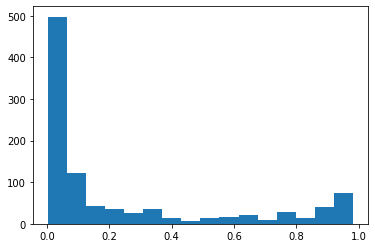

In [46]:
import matplotlib.pyplot as plt
plt.hist(y_pred, bins="auto")
plt.show()

In [48]:
# save predictions for logistic
df_res = pd.DataFrame({"author": test_df["author"].tolist(), "gender" : y_pred, "true_y" : test_labels  })
df_res.to_csv (r'Q:\tooBigToDrive\data-mining\kaggle\my_models\spaCy\results\finals\csv\4000\subsDrop_ensemble_e4.csv', index = False, header=True)